In [20]:
import json
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
query_url = 'https://data.boston.gov/api/3/action/datastore_search'

def fetch_311_data(resource_id, limit=1000, offset=0):
    url = f'{query_url}?resource_id={resource_id}&limit={limit}&offset={offset}'
    fileobj = urllib.request.urlopen(url)
    response_dict = json.loads(fileobj.read())
    return response_dict['result']['records']
# Accesses the resource ids for each year's data in the API request
resource_ids_file_path = 'https://raw.githubusercontent.com/alexnoorr/CS506_FinalProject/refs/heads/DataCollection-3/Data%20Collection/resource_ids.csv'
resource_ids_df = pd.read_csv(resource_ids_file_path)

all_data = []

# THIS SHOULD RUN FOR A FEW MINUTES IT'S NORMAL
for _, row in resource_ids_df.iterrows():
    year = row['Year']
    resource_id = row['Resource ID']

    print(f"Fetching data for {year} with resource ID: {resource_id}")

    offset = 0
    batch_size = 10000

    while True:
        batch_data = fetch_311_data(resource_id, limit=batch_size, offset=offset)
        if not batch_data:
            break
        all_data.extend(batch_data)
        offset += batch_size

Fetching data for 2010-2011 with resource ID: 94b499d9-712a-4d2a-b790-7ceec5c9c4b1
Fetching data for 2011-2012 with resource ID: 382e10d9-1864-40ba-bef6-4eea3c75463c
Fetching data for 2012-2013 with resource ID: 407c5cd0-f764-4a41-adf8-054ff535049e
Fetching data for 2013-2014 with resource ID: bdae89c8-d4ce-40e9-a6e1-a5203953a2e0
Fetching data for 2014-2015 with resource ID: c9509ab4-6f6d-4b97-979a-0cf2a10c922b
Fetching data for 2015-2016 with resource ID: b7ea6b1b-3ca4-4c5b-9713-6dc1db52379a
Fetching data for 2016-2017 with resource ID: 30022137-709d-465e-baae-ca155b51927d
Fetching data for 2017-2018 with resource ID: 2be28d90-3a90-4af1-a3f6-f28c1e25880a
Fetching data for 2018-2019 with resource ID: ea2e4696-4a2d-429c-9807-d02eb92e0222
Fetching data for 2019-2020 with resource ID: 6ff6a6fd-3141-4440-a880-6f60a37fe789
Fetching data for 2020-2021 with resource ID: f53ebccd-bc61-49f9-83db-625f209c95f5
Fetching data for 2021-2022 with resource ID: 81a7b022-f8fc-4da5-80e4-b160058ca207
Fetc

In [13]:
df = pd.DataFrame(all_data)
df['open_dt'] = pd.to_datetime(df['open_dt'], errors='coerce')
df['year'] = df['open_dt'].dt.year
print(f'This should be 3,031,846: {len(df)}')
df_filtered = df[df['year'] != 2010]
print(len(df_filtered)) #Smaller than 3,031,646
df.head()

This should be 3,031,846: 3039306
3039306


,_id,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,...,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source,year
0,1,101000295613,2011-06-30 21:32:33,2011-07-14 21:32:32,2011-07-01 01:06:58,ONTIME,Closed,Case Closed Case Resolved replaced 100 amp fus...,Street Light Outages,Public Works Department,...,7,Ward 17,1714,INTERSECTION Groveland St & River St,None,42.27154416019889,-71.07722102041515,0101000020E6100000CC4F6F30F1C451C0ADBC83F5C122...,Employee Generated,2011
1,2,101000295614,2011-06-30 22:18:31,2011-07-04 22:18:31,2011-07-01 02:12:43,ONTIME,Closed,Case Closed Case Scheduled Items have been sch...,Schedule a Bulk Item Pickup,Public Works Department,...,10,Ward 20,2008,39 Lorraine St,02131,42.28384964675283,-71.14474080817594,0101000020E6100000C960F36E43C951C06CE46A2F5524...,Self Service,2011
2,3,101000295615,2011-06-30 22:28:04,2011-08-14 22:28:04,2011-08-01 11:21:46,ONTIME,Closed,Case Closed Case Resolved No Sidewalk and poor...,New Sign Crosswalk or Pavement Marking,Transportation - Traffic Division,...,12,Ward 20,2017,INTERSECTION Corey St & Lagrange St,None,42.300277970295845,-71.16980478173973,0101000020E6100000B311E014DECA51C0A1102F826F26...,Self Service,2011
3,4,101000295616,2011-06-30 23:03:48,2011-07-14 23:03:48,2011-07-22 12:13:45,OVERDUE,Closed,Case Closed Case Resolved completed,Street Light Outages,Public Works Department,...,10,Ward 18,1816,235 Fairmount Ave,02136,42.24963961259866,-71.11563081862258,0101000020E61000003219CE7E66C751C0DDF2D930F41F...,Self Service,2011
4,5,101000295617,2011-06-30 23:12:31,None,2011-07-01 02:12:38,ONTIME,Closed,Case Closed Case Resolved,Highway Maintenance,Public Works Department,...,7,Ward 13,1309,INTERSECTION Dorchester Ave & Hallam St,None,42.31443571025152,-71.05687844130581,0101000020E6100000615079E5A3C351C0C71CEA6D3F28...,Constituent Call,2011


### Requests Per Year

In [14]:
df['year'] = df['open_dt'].dt.year

requests_per_year = df.groupby('year')['case_enquiry_id'].count()

print(requests_per_year)

year
2011     58262
2012    118092
2013    142610
2014    147820
2015    210083
2016    216535
2017    251269
2018    262748
2019    259022
2020    251222
2021    273784
2022    276633
2023    313211
2024    258015
Name: case_enquiry_id, dtype: int64


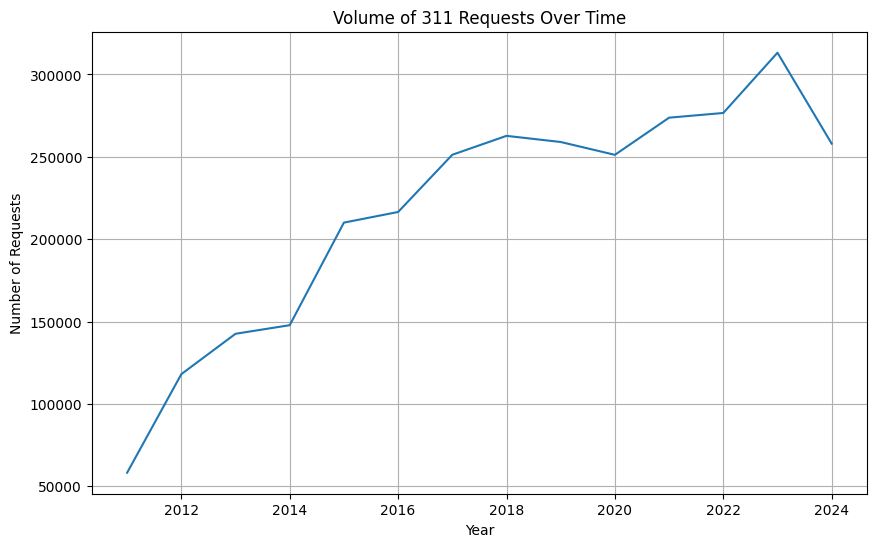

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(requests_per_year.index, requests_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Requests')
plt.title('Volume of 311 Requests Over Time')
plt.grid(True)
plt.show()

In [16]:

request_counts = df.groupby('case_title')['case_enquiry_id'].count()
top_5_requests = request_counts.sort_values(ascending=False).head(5)
top_5_requests

case_title
Parking Enforcement                    419233
Requests for Street Cleaning           205462
Schedule a Bulk Item Pickup            177305
Improper Storage of Trash (Barrels)    128226
Request for Pothole Repair             125614
Name: case_enquiry_id, dtype: int64

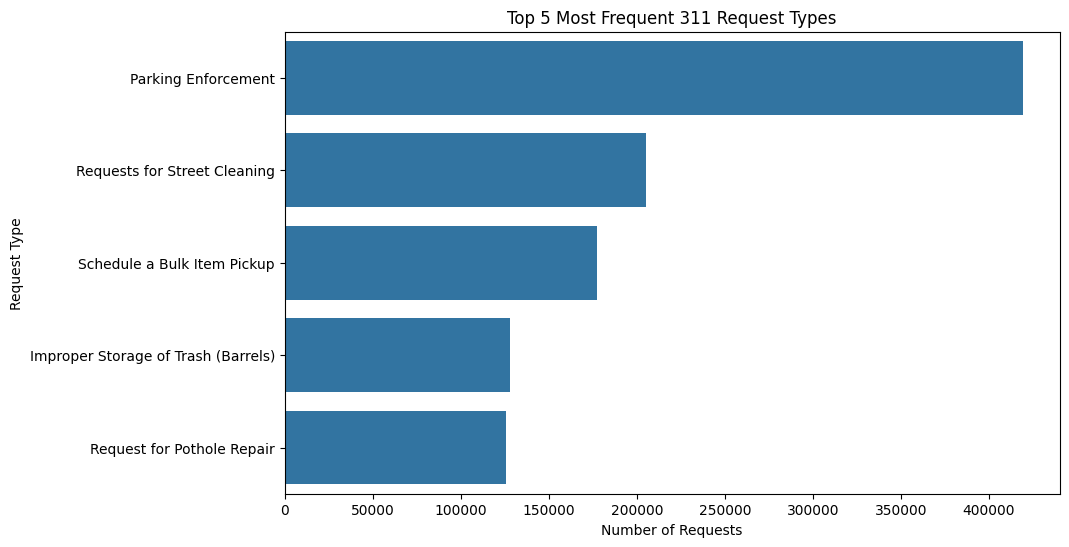

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_requests.values, y=top_5_requests.index)
plt.xlabel('Number of Requests')
plt.ylabel('Request Type')
plt.title('Top 5 Most Frequent 311 Request Types')
plt.show()